### Load the VGG16 pre-trained model using Keras ([article](https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/))

In [0]:
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.utils.vis_utils import plot_model
from IPython.display import Image, display

In [0]:
# Download and load the model (about 500M)
model = VGG16()

# Check that it is correctly placed in this directory
!ls -l ~/.keras/models

Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 6s 0us/step


In [0]:
# Print all the layers of the model
# See that the model expects images as input with the size 224 x 224 pixels with 3 channels (e.g. color)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

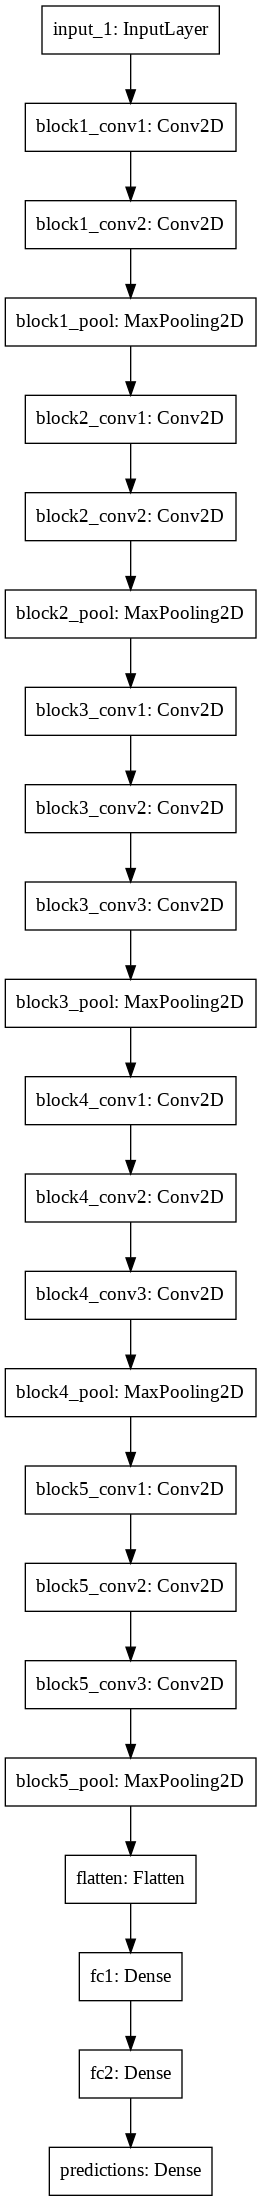

In [0]:
# Plot the model graph to an image file
plot_model(model, to_file='vgg.png')

# and display the image
display(Image('vgg.png'))

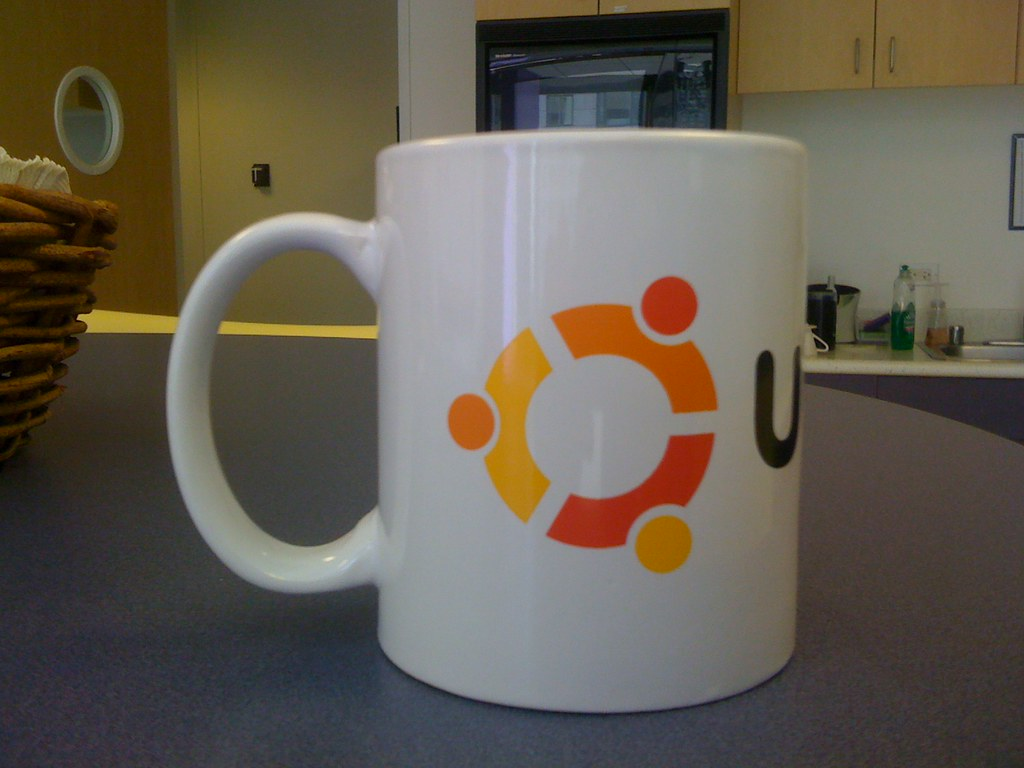

In [0]:
# Download a sample image file (of a mug) to classify
!wget 'https://live.staticflickr.com/4091/4994221690_d070e8a355_b_d.jpg'
!mv 4994221690_d070e8a355_b_d.jpg mug.jpg

display(Image('mug.jpg'))

In [0]:
# load an image from file and resize it to the required size of 224×224 pixels
image = load_img('mug.jpg', target_size=(224, 224))

# convert the image pixels to a numpy array
image = img_to_array(image)

# reshape data for the model by adding an extra dimension. the input array 
# will need to be 4-dimensional: samples, rows, columns, and channels.
# Alternately: image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = np.expand_dims(image, axis=0)

# prepare the image for the VGG model
image = preprocess_input(image)

# predict the probability across all output classes
yhat = model.predict(image)

# interpret the predictions
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
# present the most likely 2 predictions based on their probabilities
topPreds = decode_predictions(yhat, top=2)[0]
first, second = topPreds[0], topPreds[1]
print('Top Predictions: %s (%.2f%%), %s (%.2f%%)' % (first[1], first[2]*100, second[1], second[2]*100))

print(topPreds) # Just to see the tuples

Top Predictions: coffee_mug (74.83%), coffeepot (9.20%)
[('n03063599', 'coffee_mug', 0.7482547), ('n03063689', 'coffeepot', 0.09197359)]


### Download the VGG19 pre-trained model and train it from scratch with Tensorflow ([article](https://medium.com/nanonets/how-to-use-deep-learning-when-you-have-limited-data-part-2-data-augmentation-c26971dc8ced), [notebook](https://github.com/thatbrguy/VGG19-Transfer-Learn), [VGG19.npy](https://mega.nz/#!xZ8glS6J!MAnE91ND_WyfZ_8mvkuSa2YcA7q-1ehfSm-Q1fxOvvs), [sample dataset](https://drive.google.com/drive/folders/1GpIpbqBQ_ak1Z_4yAj7t6YRqDDyyBbAq?usp=sharing))

Right now I'm not sure how to download the model file from the mega.nz download site onto Colab because there is no download URL that is easy to find. It might be possible to download the megatools command line tool from here - https://megatools.megous.com/ and then use the 'megatools dl' command. Right now the megatools site just has source code, so I have to figure out which linux OS colab uses and then figure out how to get the appropriate megatools binaries.

All this is quite painful and time consuming, so I will take this up when there is more time.